### the task can be solved by a global classifier 

# Methods description

* **centralized** finds global classifier using the centralized data
* **average** between neighbors
* **regularised** learns local classifiers keeping them similar to the neighbors' classifiers
* **local** learns independent local classifiers
* **lafond** learns local classifiers similar to neighbors' ones by GAC routine

# Graphs

* **random** an edge is drawn between any two nodes with probability = p
* **complete**

the weights of the edges are all equals (1/nb neighbors)

In [40]:
# imports
from copy import deepcopy
import numpy as np

import sys
sys.path.append('../src/')

from classification import RandomClassifier
from evaluation import clf_variance, central_loss, central_accuracy
from network import random_graph, complete_graph
from optimization import average_FW, local_FW, neighbor_FW, centralized_FW, regularized_local_FW
from related_works import lafond_FW
from utils import load_dense_dataset, load_breast_dataset, generate_models, generate_samples

import matplotlib.pyplot as plt
%matplotlib inline


In [41]:
NB_ITER = 100
N = 30

TRAIN_FILE = "../datasets/ijcnn1.train"
TEST_FILE = "../datasets/ijcnn1.test"

train_x, train_y = load_dense_dataset(TRAIN_FILE)
test_x, test_y = load_dense_dataset(TEST_FILE)
D = test_x.shape[1]

# data are drawn IID
nodes = complete_graph(train_x, train_y, nb_nodes=N, cluster_data=False)

# set test set
test_m = test_x.shape[0]
test_x_copy = np.c_[test_x, np.ones(test_m)]
for n in nodes:
    n.set_test_set(test_x_copy, test_y)

In [42]:
# set callbacks for optimization analysis
callbacks = {
    'accuracy': [central_accuracy, []],
    'loss': [central_loss, []],
    'clf-variance': [clf_variance, []]
}

methods = {
    "centralized": centralized_FW, 
    "average": average_FW
}

results = {}
for k, m in methods.items():

    nodes_copy = deepcopy(nodes)
    results[k] = m(nodes_copy, D, NB_ITER, callbacks=callbacks)

# lafond method
nodes_copy = deepcopy(nodes)
results["lafond"] = lafond_FW(nodes, D, NB_ITER, callbacks=callbacks)

random_clf = RandomClassifier()
train_acc_rnd = random_clf.score(train_x, train_y)
test_acc_rnd = random_clf.score(test_x, test_y)

print("done")

done


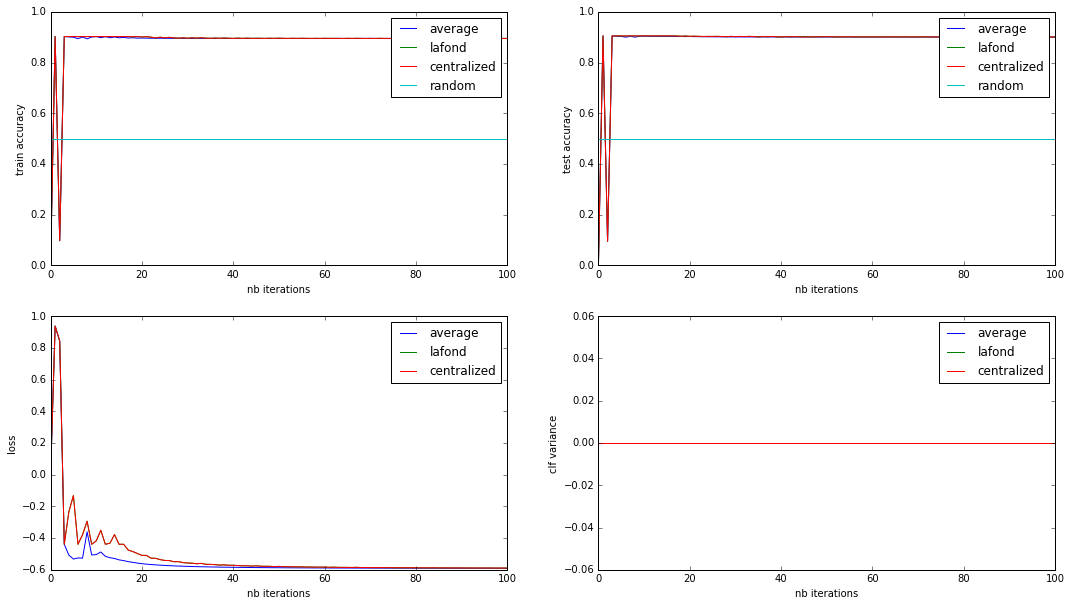

In [43]:
plt.figure(1, figsize=(18, 10))

plt.subplot(221)
plt.xlabel('nb iterations')
plt.ylabel('train accuracy')

for k, r_list in results.items():
    plt.plot(range(len(r_list)), [r['accuracy'][0] for r in r_list], label='{}'.format(k))
plt.plot(range(len(r_list)), [train_acc_rnd]*len(r_list), label='random')
plt.legend()

plt.subplot(222)
plt.xlabel('nb iterations')
plt.ylabel('test accuracy')

for k, r_list in results.items():
    plt.plot(range(len(r_list)), [r['accuracy'][1] for r in r_list], label='{}'.format(k))
plt.plot(range(len(r_list)), [test_acc_rnd]*len(r_list), label='random')
plt.legend()

plt.subplot(223)
plt.xlabel('nb iterations')
plt.ylabel('loss')

for k, r_list in results.items():
    plt.plot(range(len(r_list)), [r['loss'] for r in r_list], label='{}'.format(k))

plt.legend()

plt.subplot(224)
plt.xlabel('nb iterations')
plt.ylabel('clf variance')

for k, r_list in results.items():
    plt.plot(range(len(r_list)), [r['clf-variance'] for r in r_list], label='{}'.format(k))

plt.legend()

#### Focus on first iterations

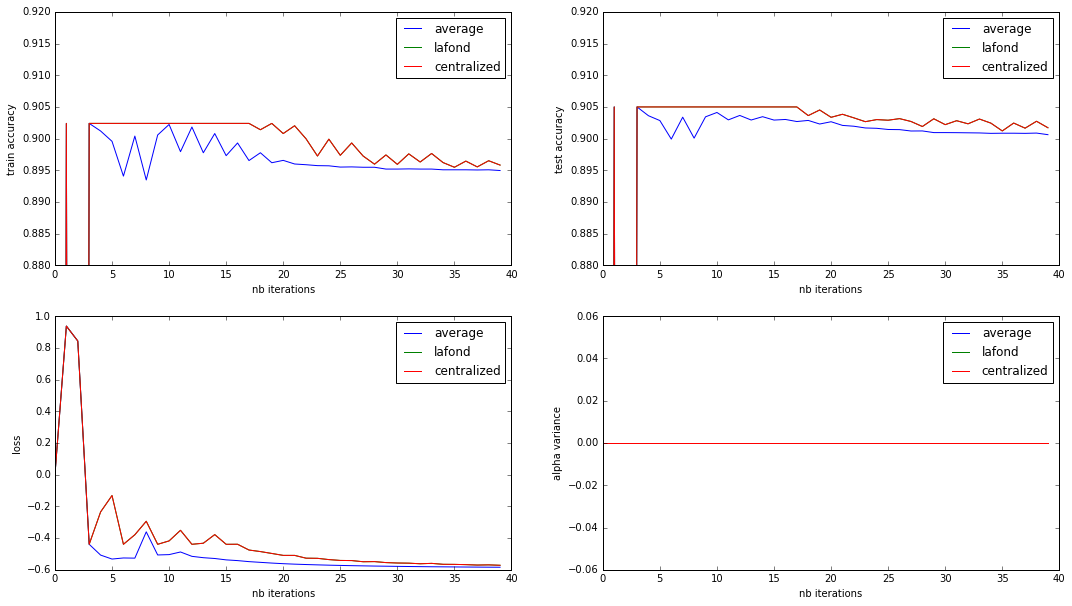

In [44]:
plt.figure(1, figsize=(18, 10))
max_iter = 40

plt.subplot(221)
plt.xlabel('nb iterations')
plt.ylabel('train accuracy')
plt.ylim((0.88, 0.92))

for k, r_list in results.items():
    plt.plot(range(max_iter), [r['accuracy'][0] for r in r_list[:max_iter]], label='{}'.format(k))
plt.legend()

plt.subplot(222)
plt.xlabel('nb iterations')
plt.ylabel('test accuracy')
plt.ylim((0.88, 0.92))

for k, r_list in results.items():
    plt.plot(range(max_iter), [r['accuracy'][1] for r in r_list[:max_iter]], label='{}'.format(k))
plt.legend()

plt.subplot(223)
plt.xlabel('nb iterations')
plt.ylabel('loss')
# plt.ylim((0, 0.1))

for k, r_list in results.items():
    plt.plot(range(max_iter), [r['loss'] for r in r_list[:max_iter]], label='{}'.format(k))

plt.legend()

plt.subplot(224)
plt.xlabel('nb iterations')
plt.ylabel('alpha variance')
# plt.ylim((0, 0.1))

for k, r_list in results.items():
    plt.plot(range(max_iter), [r['clf-variance'] for r in r_list[:max_iter]], label='{}'.format(k))
plt.legend()

#### Random graph

In [45]:
NB_ITER = 100
N = 30
P_EDGE = 0.1

TRAIN_FILE = "../datasets/ijcnn1.train"
TEST_FILE = "../datasets/ijcnn1.test"

train_x, train_y = load_dense_dataset(TRAIN_FILE)
test_x, test_y = load_dense_dataset(TEST_FILE)
D = test_x.shape[1]

nodes = random_graph(train_x, train_y, nb_nodes=N, prob_edge=P_EDGE, cluster_data=True)

# set test set
test_m = test_x.shape[0]
test_x_copy = np.c_[test_x, np.ones(test_m)]
for n in nodes:
    n.set_test_set(test_x_copy, test_y)

In [46]:
# set callbacks for optimization analysis
callbacks = {
    'accuracy': [central_accuracy, []],
    'loss': [central_loss, []],
    'clf-variance': [clf_variance, []]
}

methods = {
    "centralized": centralized_FW, 
    "average": average_FW
}

results = {}
for k, m in methods.items():

    nodes_copy = deepcopy(nodes)
    results[k] = m(nodes_copy, D, NB_ITER, callbacks=callbacks)

# lafond method
nodes_copy = deepcopy(nodes)
results["lafond"] = lafond_FW(nodes, D, NB_ITER, callbacks=callbacks)

random_clf = RandomClassifier()
train_acc_rnd = random_clf.score(train_x, train_y)
test_acc_rnd = random_clf.score(test_x, test_y)

print("done")

done


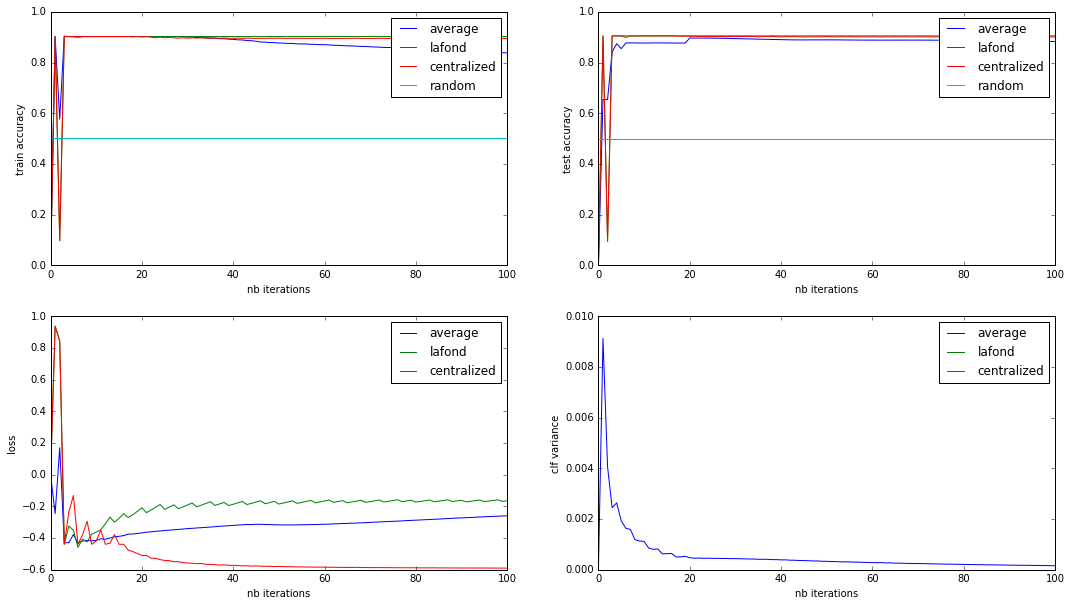

In [47]:
plt.figure(1, figsize=(18, 10))

plt.subplot(221)
plt.xlabel('nb iterations')
plt.ylabel('train accuracy')

for k, r_list in results.items():
    plt.plot(range(len(r_list)), [r['accuracy'][0] for r in r_list], label='{}'.format(k))
plt.plot(range(len(r_list)), [train_acc_rnd]*len(r_list), label='random')
plt.legend()

plt.subplot(222)
plt.xlabel('nb iterations')
plt.ylabel('test accuracy')

for k, r_list in results.items():
    plt.plot(range(len(r_list)), [r['accuracy'][1] for r in r_list], label='{}'.format(k))
plt.plot(range(len(r_list)), [test_acc_rnd]*len(r_list), label='random')
plt.legend()

plt.subplot(223)
plt.xlabel('nb iterations')
plt.ylabel('loss')

for k, r_list in results.items():
    plt.plot(range(len(r_list)), [r['loss'] for r in r_list], label='{}'.format(k))

plt.legend()

plt.subplot(224)
plt.xlabel('nb iterations')
plt.ylabel('clf variance')

for k, r_list in results.items():
    plt.plot(range(len(r_list)), [r['clf-variance'] for r in r_list], label='{}'.format(k))

plt.legend()

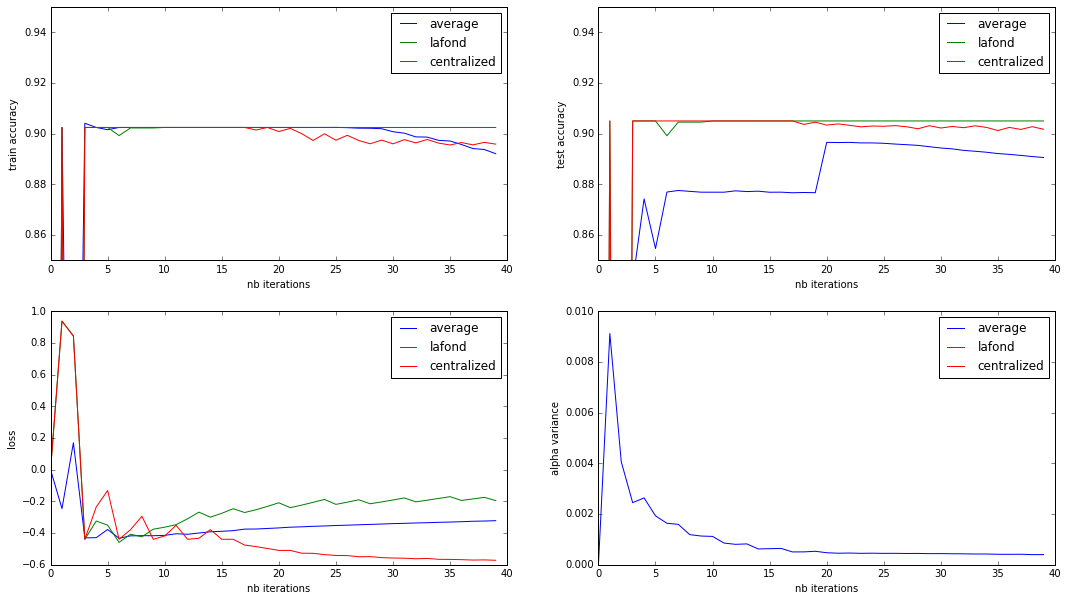

In [49]:
plt.figure(1, figsize=(18, 10))
max_iter = 40

plt.subplot(221)
plt.xlabel('nb iterations')
plt.ylabel('train accuracy')
plt.ylim((0.85, 0.95))

for k, r_list in results.items():
    plt.plot(range(max_iter), [r['accuracy'][0] for r in r_list[:max_iter]], label='{}'.format(k))
plt.legend()

plt.subplot(222)
plt.xlabel('nb iterations')
plt.ylabel('test accuracy')
plt.ylim((0.85, 0.95))

for k, r_list in results.items():
    plt.plot(range(max_iter), [r['accuracy'][1] for r in r_list[:max_iter]], label='{}'.format(k))
plt.legend()

plt.subplot(223)
plt.xlabel('nb iterations')
plt.ylabel('loss')
# plt.ylim((0, 0.1))

for k, r_list in results.items():
    plt.plot(range(max_iter), [r['loss'] for r in r_list[:max_iter]], label='{}'.format(k))

plt.legend()

plt.subplot(224)
plt.xlabel('nb iterations')
plt.ylabel('alpha variance')
# plt.ylim((0, 0.1))

for k, r_list in results.items():
    plt.plot(range(max_iter), [r['clf-variance'] for r in r_list[:max_iter]], label='{}'.format(k))
plt.legend()